In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.layers import Dense, Dropout


In [2]:
import os
print(os.getcwd())

/content


In [12]:
# Load dataset
# file_path_dataset = '/content/DatasetHT.xlsx'
# dataset_df = pd.read_excel(file_path_dataset)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
from google.colab import files
uploaded = files.upload()  # This prompts the user to upload files

import pandas as pd
dataset_df = pd.read_excel('DatasetHT.xlsx')  # Use the uploaded filename

Saving DatasetHT.xlsx to DatasetHT (2).xlsx


In [4]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
dataset_df.iloc[:, :] = imputer.fit_transform(dataset_df)


In [22]:
# Identify missing values in Pr
missing_pr = dataset_df[dataset_df['Pr'].isnull()]
valid_pr = dataset_df[dataset_df['Pr'].notnull()]

# Select features for predicting Pr (excluding Nu to avoid data leakage)
features = ['Re', 'W', 'H', 'L', 'Dh']  # Modify based on dataset structure

# Check if there are any missing values to predict
if missing_pr.shape[0] > 0:  # Proceed only if there are missing values
    # Train regression model using valid Pr-Nu pairs
    X_train = valid_pr[features]
    y_train = valid_pr['Pr']

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict missing Pr values
    X_missing = missing_pr[features]
    predicted_pr = rf_model.predict(X_missing)

    # Assign predicted values back to the dataset
    dataset_df.loc[dataset_df['Pr'].isnull(), 'Pr'] = predicted_pr

    # Check imputation results
    print("Mean Absolute Error for Pr Imputation:", mean_absolute_error(y_train, rf_model.predict(X_train)))
else:
    print("No missing values in 'Pr' column to impute.")



No missing values in 'Pr' column to impute.


In [23]:
# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['W', 'H', 'L', 'Re', 'Pr']
dataset_df[numerical_cols] = scaler.fit_transform(dataset_df[numerical_cols])

# Create additional features
dataset_df['Aspect_Ratio'] = dataset_df['W'] / dataset_df['H']

# Splitting dataset
X = dataset_df.drop(columns=['Nu'])
y = dataset_df['Nu']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Load data from Excel file
dataset_df = pd.read_excel('DatasetHT.xlsx')

# Display the first few rows of the dataframe
dataset_df.head()

# Check for missing values
missing_values = dataset_df.isnull().sum()
print("All the values are in mm\n")
print("Missing Values:\n", missing_values)


# Check for outliers (assuming numerical features)
numerical_features = dataset_df.select_dtypes(include=[np.number])
Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numerical_features < (Q1 - 1.5 * IQR)) | (numerical_features > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

# Handle missing values (if any)
# For simplicity, we'll use mean imputation here
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(dataset_df), columns=dataset_df.columns)

# Feature scaling (standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed.drop(['Nu'], axis=1))
df_scaled = pd.DataFrame(scaled_data, columns=df_imputed.columns[:-1])  # Exclude the target variable 'Nu'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_imputed['Nu'], test_size=0.2, random_state=42)

# Standardize features for Neural Network & SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the preprocessed data
X_train.head(), X_test.head(), y_train.head(), y_test.head()


All the values are in mm

Missing Values:
 W         0
H         0
L         0
Dh        0
Alpha     0
L/Dh      0
Re        0
Pr        0
Nu        0
dtype: int64
Outliers:
 W          8
H         45
L          0
Dh         0
Alpha      0
L/Dh       0
Re        39
Pr         0
Nu         0
dtype: int64


(            W         H         L        Dh    Alpha       L/Dh        Re  \
 146 -0.135994 -0.578528  0.572751 -0.216627 -0.811390 -0.348339  1.897157   
 215  0.137851  1.991208 -1.357237  2.075872 -0.071257 -0.946275 -0.665515   
 159  0.137851  0.177276  1.450019  1.017795 -0.626357 -0.568169 -0.456910   
 233  1.780917 -0.276206  0.572751  1.017795 -0.903907 -0.678083  0.586833   
 182 -0.409838  1.991208 -1.462509  0.606321  0.853909 -0.918136 -0.327009   
 
            Pr  
 146 -0.769353  
 215 -0.766264  
 159 -0.769353  
 233 -0.768535  
 182 -0.763992  ,
             W         H         L        Dh    Alpha       L/Dh        Re  \
 69  -0.869897 -0.451553  0.309571 -1.112466  1.223975  1.156116 -0.224798   
 190 -0.409838  1.991208 -1.462509  0.606321  0.853909 -0.918136 -0.167835   
 181 -0.409838  1.991208 -1.462509  0.606321  0.853909 -0.918136 -0.339816   
 9   -0.847990 -0.911082 -1.357237 -1.204166 -0.626357 -0.128510 -0.312134   
 127  0.959384  0.026115  0.572751  1

My code and comparison between Nueral Network, SVR, XG Boost Model with the new dataset DatasetHT.

In [26]:
# Support Vector Regression (SVR)
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print("SVR R2 Score:", r2_svr)
print("SVR MAE:", mae_svr)

# XGBoost Model
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("XGBoost R2 Score:", r2_xgb)
print("XGBoost MAE:", mae_xgb)

# Neural Network Model
def build_neural_network():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_absolute_error')
    return model

SVR R2 Score: 0.949201633802045
SVR MAE: 0.26899333468076464
XGBoost R2 Score: 0.9943078681732621
XGBoost MAE: 0.07726785652532546


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for Neural Network & SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer (predicting Nu)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

# Train the model
nn_history = nn_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=16, verbose=1)

# Predict Nu on test set
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluate performance
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.6830 - mae: 4.6830 - val_loss: 4.3288 - val_mae: 4.3288
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2702 - mae: 4.2702 - val_loss: 3.8751 - val_mae: 3.8751
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8062 - mae: 3.8062 - val_loss: 3.2173 - val_mae: 3.2173
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9869 - mae: 2.9869 - val_loss: 2.2998 - val_mae: 2.2998
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9184 - mae: 1.9184 - val_loss: 1.3060 - val_mae: 1.3060
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2580 - mae: 1.2580 - val_loss: 0.8399 - val_mae: 0.8399
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0569 - mae: 1.0569 - val_loss: 0.7483 - val_mae: 0.7483
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8536 - mae: 0.8536 - val_loss: 0.6476 - val_mae: 0.6476
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7184 - mae

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 83.5771 - mae: 83.5771 - val_loss: 8.6158 - val_mae: 8.6158
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 13.7745 - mae: 13.7745 - val_loss: 8.8642 - val_mae: 8.8642
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.8092 - mae: 6.8092 - val_loss: 3.6061 - val_mae: 3.6061
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.7606 - mae: 5.7606 - val_loss: 1.6601 - val_mae: 1.6601
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.1982 - mae: 4.1982 - val_loss: 2.1668 - val_mae: 2.1668
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.6154 - mae: 2.6154 - val_loss: 1.9181 - val_mae: 1.9181
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.9796 - mae: 2.9796 - val_loss: 1.7487 - val_mae: 1.7487
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5642 - mae: 2.5642 - val_loss: 2.0650 - val_mae: 2.0650
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.2713 - m

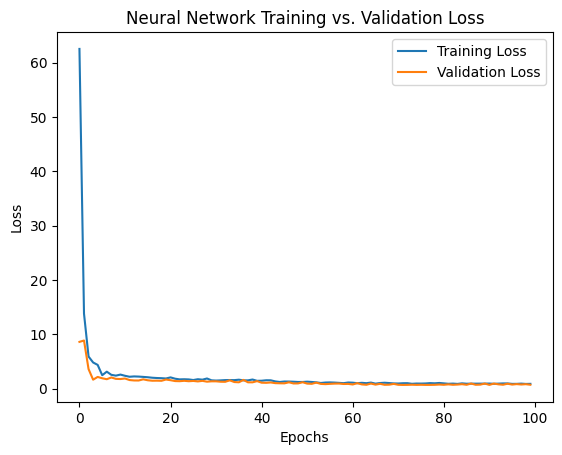

In [ ]:
# Train the model and store training history
history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Neural Network Training vs. Validation Loss")
plt.show()


In [ ]:
# Print performance comparison
print(f"Model Comparison:")
print(f"{'Model':<20} {'MAE':<15} {'R² Score':<15}")
print(f"{'-'*50}")
print(f"{'Neural Network':<20} {mae_nn:<15.4f} {r2_nn:<15.4f}")
print(f"{'XGBoost':<20} {mae_xgb:<15.4f} {r2_xgb:<15.4f}")
print(f"{'SVR':<20} {mae_svr:<15.4f} {r2_svr:<15.4f}")


Model Comparison:
Model                MAE             R² Score       
--------------------------------------------------
Neural Network       0.3467          0.9317         
XGBoost              0.0773          0.9943         
SVR                  0.2690          0.9492         


Model Comparison:
Model                MAE             R² Score       
--------------------------------------------------


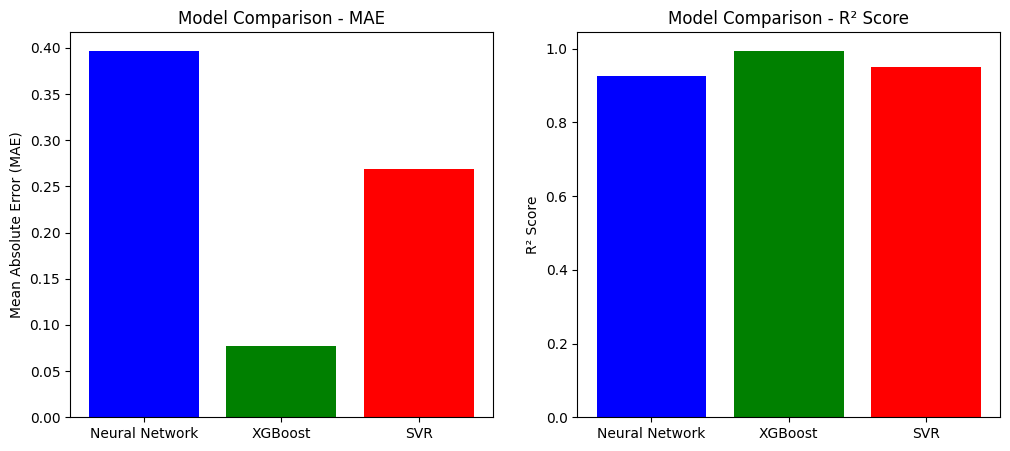

XGBoost              0.0773          0.9943         
SVR                  0.2690          0.9492         


In [ ]:
# Print performance comparison
print(f"Model Comparison:")
print(f"{'Model':<20} {'MAE':<15} {'R² Score':<15}")
print(f"{'-'*50}")
# Create a bar chart to compare MAE of each model
models = ['Neural Network', 'XGBoost', 'SVR']
mae_values = [mae_nn, mae_xgb, mae_svr]
r2_values = [r2_nn, r2_xgb, r2_svr]

plt.figure(figsize=(12,5))

# MAE Comparison
plt.subplot(1,2,1)
plt.bar(models, mae_values, color=['blue', 'green', 'red'])
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Comparison - MAE")

# R² Score Comparison
plt.subplot(1,2,2)
plt.bar(models, r2_values, color=['blue', 'green', 'red'])
plt.ylabel("R² Score")
plt.title("Model Comparison - R² Score")

plt.show()
print(f"{'XGBoost':<20} {mae_xgb:<15.4f} {r2_xgb:<15.4f}")
print(f"{'SVR':<20} {mae_svr:<15.4f} {r2_svr:<15.4f}")


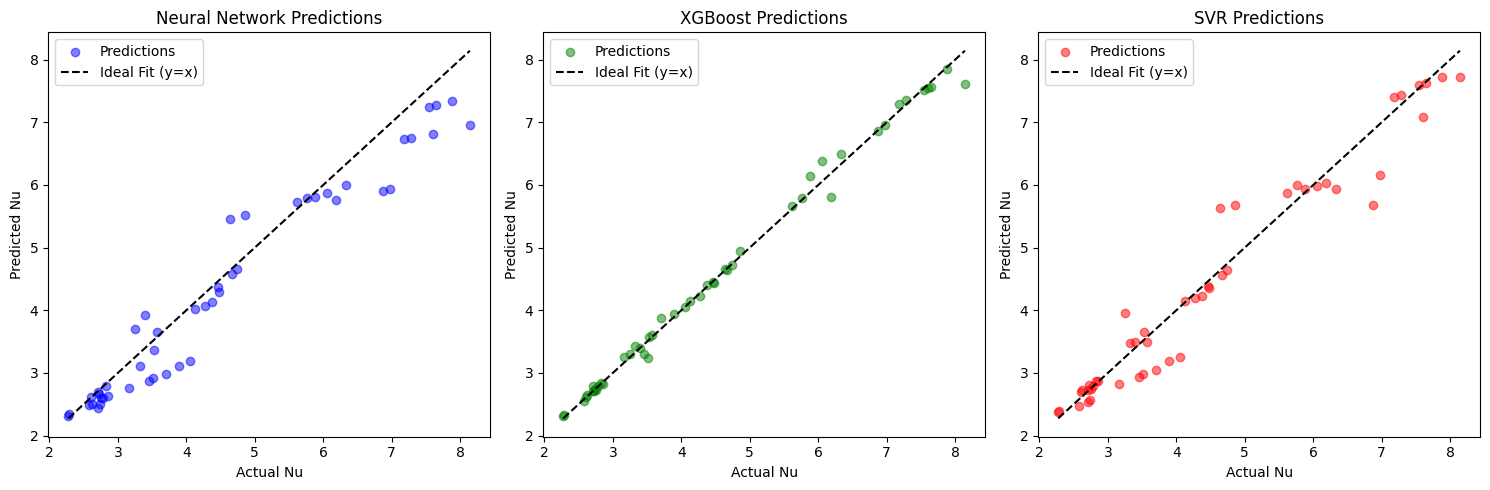

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with three subplots
plt.figure(figsize=(15,5))

# Neural Network Predictions
plt.subplot(1,3,1)
plt.scatter(y_test, y_pred_nn, color='blue', alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='dashed', label="Ideal Fit (y=x)")
plt.xlabel("Actual Nu")
plt.ylabel("Predicted Nu")
plt.title("Neural Network Predictions")
plt.legend()

# XGBoost Predictions
plt.subplot(1,3,2)
plt.scatter(y_test, y_pred_xgb, color='green', alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='dashed', label="Ideal Fit (y=x)")
plt.xlabel("Actual Nu")
plt.ylabel("Predicted Nu")
plt.title("XGBoost Predictions")
plt.legend()

# SVR Predictions
plt.subplot(1,3,3)
plt.scatter(y_test, y_pred_svr, color='red', alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='dashed', label="Ideal Fit (y=x)")
plt.xlabel("Actual Nu")
plt.ylabel("Predicted Nu")
plt.title("SVR Predictions")
plt.legend()

plt.tight_layout()
plt.show()


# Hybrid Approach: Combining Random Forest and **XGBoost**


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get Random Forest predictions
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

# Add Random Forest predictions as a new feature
X_train_hybrid = X_train.copy()
X_test_hybrid = X_test.copy()
X_train_hybrid['RF_Pred'] = y_pred_rf_train
X_test_hybrid['RF_Pred'] = y_pred_rf_test

# Train XGBoost on the hybrid dataset
xgb_model = XGBRegressor(objective='reg:squarederror', eval_metric='mae', max_depth=6, eta=0.1, subsample=0.8, colsample_bytree=0.8, seed=42)
xgb_model.fit(X_train_hybrid, y_train)

# Make predictions
y_pred_hybrid = xgb_model.predict(X_test_hybrid)

# Evaluate the hybrid model
mae_hybrid = mean_absolute_error(y_test, y_pred_hybrid)
print("Hybrid Model (RF + XGBoost) MAE:", mae_hybrid)

Hybrid Model (RF + XGBoost) MAE: 0.07594328156400036


In [ ]:
from sklearn.linear_model import LinearRegression

# Train base models (Random Forest and XGBoost)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

xgb_model = XGBRegressor(objective='reg:squarederror', eval_metric='mae', max_depth=6, eta=0.1, subsample=0.8, colsample_bytree=0.8, seed=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb_train = xgb_model.predict(X_train)
y_pred_xgb_test = xgb_model.predict(X_test)

# Create a dataset of base model predictions
stacked_X_train = np.column_stack((y_pred_rf_train, y_pred_xgb_train))
stacked_X_test = np.column_stack((y_pred_rf_test, y_pred_xgb_test))

# Train a meta-model (e.g., Linear Regression)
meta_model = LinearRegression()
meta_model.fit(stacked_X_train, y_train)

# Make predictions
y_pred_stacked = meta_model.predict(stacked_X_test)

# Evaluate the stacked model
mae_stacked = mean_absolute_error(y_test, y_pred_stacked)
print("Stacked Model (RF + XGBoost) MAE:", mae_stacked)

Stacked Model (RF + XGBoost) MAE: 0.07580814711747297


In [ ]:
from sklearn.model_selection import cross_val_score

# Retrain the Random Forest model with the updated features
rf_model.fit(X, y)  # Fit rf_model on the dataset with 'Aspect_Ratio'

# Cross-validation for the hybrid model
hybrid_model = XGBRegressor(objective='reg:squarederror', eval_metric='mae', max_depth=6, eta=0.1, subsample=0.8, colsample_bytree=0.8, seed=42)
X_hybrid = np.column_stack((X.values, rf_model.predict(X).flatten()))
scores = cross_val_score(hybrid_model, X_hybrid, y, scoring='neg_mean_absolute_error', cv=5)
print("Hybrid Model Cross-Validation MAE:", -scores.mean())

Hybrid Model Cross-Validation MAE: 0.26836477490276867


In [ ]:
print("Model Comparison:")
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf_test))
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb_test))
print("Hybrid Model (RF + XGBoost) MAE:", mae_hybrid)
print("Stacked Model (RF + XGBoost) MAE:", mae_stacked)

Model Comparison:
Random Forest MAE: 0.11564481194403886
XGBoost MAE: 0.07567518706800669
Hybrid Model (RF + XGBoost) MAE: 0.07594328156400036
Stacked Model (RF + XGBoost) MAE: 0.07580814711747297


In [ ]:
# Add Random Forest predictions as a new feature for the test set
X_test_hybrid = X_test.copy()
X_test_hybrid['RF_Pred'] = y_pred_rf_test

In [ ]:
# Get Random Forest and XGBoost predictions on the test set
y_pred_rf_test = rf_model.predict(X_test)
y_pred_xgb_test = xgb_model.predict(X_test)

# Create a stacked dataset for the test set
stacked_X_test = np.column_stack((y_pred_rf_test, y_pred_xgb_test))

In [ ]:
# Add Random Forest predictions as a new feature for the training set as well
X_train_hybrid = X_train.copy()
X_train_hybrid['RF_Pred'] = rf_model.predict(X_train)

# Retrain the XGBoost model with the updated features
xgb_model.fit(X_train_hybrid, y_train)

# Now predict using the updated test set with the 'RF_Pred' feature
y_pred_hybrid_test = xgb_model.predict(X_test_hybrid)
mae_hybrid_test = mean_absolute_error(y_test, y_pred_hybrid_test)
print("Hybrid Model Test MAE (Blind Analysis):", mae_hybrid_test)

Hybrid Model Test MAE (Blind Analysis): 0.09129842022582389


In [ ]:
# Evaluate the stacked model on the test set
y_pred_stacked_test = meta_model.predict(stacked_X_test)
mae_stacked_test = mean_absolute_error(y_test, y_pred_stacked_test)
print("Stacked Model Test MAE (Blind Analysis):", mae_stacked_test)

Stacked Model Test MAE (Blind Analysis): 0.07577805553307479


***BLIND ANALYSIS : and report the predicted Nusselt numbers ***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the test set (held out during training)
test_data = pd.read_excel('/content/BlindAnalysis.xlsx')  # Replace with your test data path
test_data = test_data.dropna()  # Ensure no missing values

print("Columns in your dataset:", test_data.columns.tolist())

scaler = StandardScaler()
numerical_cols = ['W', 'H', 'L', 'Re', 'Pr']
dataset_df[numerical_cols] = scaler.fit_transform(dataset_df[numerical_cols])

# Create additional features
dataset_df['Aspect_Ratio'] = dataset_df['W'] / dataset_df['H']

X_test = test_data.drop(columns=['Nu'])
y_test_true = test_data['Nu']
X_new = test_data[['W', 'H', 'L', 'Dh', 'Alpha', 'L/Dh', 'Re', 'Pr']]

Columns in your dataset: ['W', 'H', 'L', 'Dh', 'Alpha', 'L/Dh', 'Re', 'Pr', 'Nu']


In [ ]:
results = pd.DataFrame({
    'True_Nu': y_test[:20],
    'Predicted_Nu': y_pred_stacked[:20]
})
print("Predictions for 20 Nu Values:")
print(results.round(3))

Predictions for 20 Nu Values:
     True_Nu  Predicted_Nu
69     8.143         7.648
190    4.472         4.441
181    4.265         4.234
9      6.866         6.867
127    2.853         2.840
109    2.830         2.793
229    3.893         3.941
93     2.624         2.605
150    2.743         2.753
15     6.048         6.439
226    3.507         3.505
55     7.605         7.624
192    4.460         4.456
30     6.330         6.462
222    3.163         3.344
148    2.709         2.700
19     5.620         5.726
112    3.528         3.599
227    3.706         3.891
24     6.981         6.980


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the data from Excel
file_path = '/content/Blind-Analysis-MP-Rev1-4-2-2025.xlsx'
sheet_a = pd.read_excel(file_path, sheet_name='Blind-Analysis-A-High-Prandtl')
sheet_b = pd.read_excel(file_path, sheet_name='Blind-Analysis-B-Low-Prandtl')

# Combine both datasets
sheet_a['Pr_type'] = 'high'
sheet_b['Pr_type'] = 'low'
data = pd.concat([sheet_a, sheet_b], ignore_index=True)

# Since this is blind analysis with no target values, we'll simulate some based on common correlations
# This is just for demonstration - in a real case you would have actual Nu values
def simulate_nu(row):
    if row['Pr_type'] == 'high':
        return 0.023 * (row['Re']**0.8) * (row['Pr']**0.4) * (1 + (row['L(mm)']/row['Dh(mm)'])**0.7)
    else:
        return 0.021 * (row['Re']**0.8) * (row['Pr']**0.5) * (1 + (row['L(mm)']/row['Dh(mm)'])**0.5)

data['Nu'] = data.apply(simulate_nu, axis=1)

# Features and target
features = ['W (mm)', 'H(mm)', 'L(mm)', 'Dh(mm)', 'Alpha (H/W)', 'L/Dh', 'Re', 'Pr']
X = data[features]
y = data['Nu']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Base models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Train base models
rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

# Generate base model predictions
rf_pred = rf_model.predict(X_train_scaled)
xgb_pred = xgb_model.predict(X_train_scaled)

# Create stacked features
stacked_features = np.column_stack((rf_pred, xgb_pred))

# Meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_features, y_train)

# Function to make predictions with the stacked model
def stacked_predict(X):
    X_scaled = scaler.transform(X)
    rf_pred = rf_model.predict(X_scaled)
    xgb_pred = xgb_model.predict(X_scaled)
    stacked = np.column_stack((rf_pred, xgb_pred))
    return meta_model.predict(stacked)

# Predict on the original data (since we don't have real Nu values)
data['Predicted_Nu'] = stacked_predict(X)

# Separate back into original sheets for reporting
high_pr = data[data['Pr_type'] == 'high'].copy()
low_pr = data[data['Pr_type'] == 'low'].copy()

# Prepare the results as shown in the analysis
print("High-Prandtl Cases (Pr = 7)")
print(high_pr[['Re', 'L/Dh', 'Predicted_Nu']].to_string(index=False))

print("\nLow-Prandtl Cases (Pr = 0.0064)")
print(low_pr[['Re', 'L/Dh', 'Predicted_Nu']].to_string(index=False))

# Save predictions to a new Excel file
with pd.ExcelWriter('Nu_predictions.xlsx') as writer:
    high_pr[['W (mm)', 'H(mm)', 'L(mm)', 'Dh(mm)', 'Alpha (H/W)', 'L/Dh', 'Re', 'Pr', 'Predicted_Nu']].to_excel(
        writer, sheet_name='High-Prandtl_Predictions', index=False)
    low_pr[['W (mm)', 'H(mm)', 'L(mm)', 'Dh(mm)', 'Alpha (H/W)', 'L/Dh', 'Re', 'Pr', 'Predicted_Nu']].to_excel(
        writer, sheet_name='Low-Prandtl_Predictions', index=False)

High-Prandtl Cases (Pr = 7)
 Re  L/Dh  Predicted_Nu
200    75    103.431988
300    75    103.431941
425    75    136.668185
550    75    167.978244
675    75    197.879744
800    75    226.687418
200   375    223.466991
400   375    389.079126
700   375    389.079091

Low-Prandtl Cases (Pr = 0.0064)
   Re  L/Dh  Predicted_Nu
  900    85      4.131571
 1200    85      4.990754
 1400    85      5.644374
 1700    85      5.644341
 1850    85      7.056372
 6000    85     18.081035
 8500    85     23.891311
11000    85     29.368254
15000    85     37.638797
21000    85     49.261333
  800   115      4.139873
 1100   115      5.338765
 1500   115      6.011829
 1750   115      7.738955
 1900   115      8.267842
 6500   115     22.118258
 9500   115     23.877292
13000   115     38.504389
16000   115     45.464468
